In [81]:
import numpy as np
import matplotlib.pyplot as plt

## Circuit RC

gain(fc) = 0.7071067811865475, notre approximation graphique (avec fc = 1.55 kHz) = 0.716396163813064 
g
f_theo avec k=2, [5.e+01 1.e+02 5.e+02 1.e+03 2.e+03 5.e+03 1.e+04 5.e+04 1.e+05]


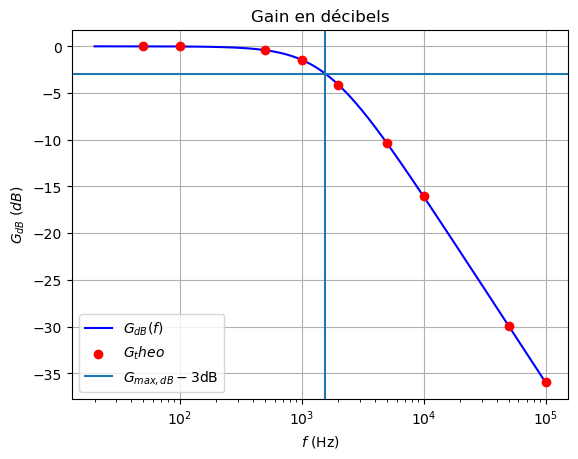

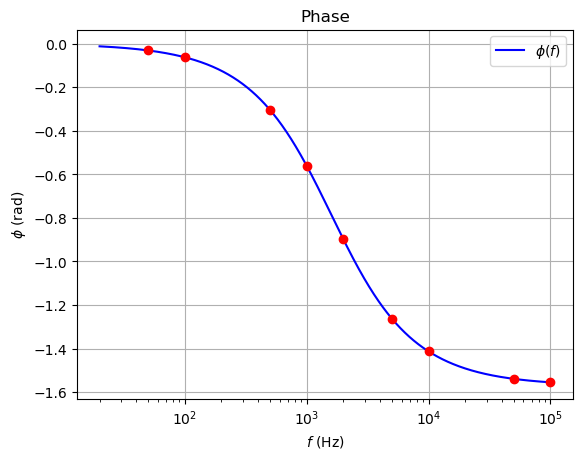

In [101]:
R = 1e3
C = 100e-9

def transfert_rc(f, R, C):
    omeg = 2*np.pi*f
    return 1/(1+1j*(R*C*omeg))
    #omeg = 2*np.pi*f
    #denom = R**2 + 1/(C*omeg)**2
    #return R/(R-1j*(1/(C*omeg)))#(R**2 + 1j*(R/(C*omeg)))/denom


def gain_rc(f, R, C):
    return np.abs(transfert_rc(f, R, C))
    #omeg = 2*np.pi*f
    #denom = R**2 + 1/(C*omeg)**2
    #return (R**2)/denom

def phase_rc(f, R, C):
    return np.angle(transfert_rc(f, R, C))
    #omeg = 2*np.pi*f
    #denom = R**2 + 1/(C*omeg)**2
    #return (R/(C*omeg))/denom







gain_max = 1
gain_fc = gain_max/np.sqrt(2)


#f_start = 20
#f_theo = f_start*np.logspace(start=0, stop=14, num=15, base=2)
f_theo = np.array([50, 100, 500, 1e3, 2e3, 5e3, 1e4, 5e4, 1e5])
gain_theo = gain_rc(f_theo, R, C)
gain_theo_db = 20*np.log10(gain_theo)

print(f"gain(fc) = {gain_fc}, notre approximation graphique (avec fc = 1.55 kHz) = {gain_rc(1.55e3, R, C)} \ng")
print(f"f_theo avec k=2, {f_theo}")

phase_theo = phase_rc(f_theo, R, C)





# specifically for electrical uses, gets multiplied by 20
def to_dB(x):
    return 20*np.log10(x)



f = np.linspace(20, 100e3, 1000000)
gain1 = gain_rc(f, R, C)
gain2 = transfert_rc(f, R, C).real

gain_dB = 20*np.log10(gain1)

plt.plot(f, gain_dB, color="b", label="$G_{dB}(f)$")
plt.scatter(f_theo, gain_theo_db, color="r", label="$G_theo$", zorder=5)
#plt.plot(w, gain2, color="r")

plt.axhline(-3, label="$G_{max, dB}-3$dB")
plt.axvline(1.55e3)

#plt.yscale("log")
plt.xscale("log")

plt.ylabel("$G_{dB}$ ($dB$)")
plt.xlabel("$f$ (Hz)")

plt.legend()
plt.title("Gain en décibels")

plt.grid()
plt.show()


phase1 = phase_rc(f, R, C)
phase2 = transfert_rc(f, R, C).imag

plt.plot(f, phase1, color="b", label="$\phi(f)$")
plt.scatter(f_theo, phase_theo, color="r", zorder=5)
#plt.plot(f, phase2, color="r")

#plt.yscale("log")
plt.xscale("log")

plt.ylabel("$\phi$ (rad)")
plt.xlabel("$f$ (Hz)")

plt.grid()
plt.legend()
plt.title("Phase")
plt.show()

In [84]:
print("Theoretical points Gain_dB for RC")
for e in f_theo:
    print(f"({e:0.2f}, {20*np.log10(gain_rc(e, R, C)):0.2f})")

Theoretical points points
(50.00, -0.00)
(100.00, -0.02)
(500.00, -0.41)
(1000.00, -1.45)
(2000.00, -4.11)
(5000.00, -10.36)
(10000.00, -16.07)
(50000.00, -29.95)
(100000.00, -35.96)


In [92]:
print("Theoretical points phase for RC")
for e in f_theo:
    print(f"({e:0.2f}, {np.rad2deg(phase_rc(e, R, C)):0.2f})")

Theoretical points phase for RC
(50.00, -1.80)
(100.00, -3.60)
(500.00, -17.44)
(1000.00, -32.14)
(2000.00, -51.49)
(5000.00, -72.34)
(10000.00, -80.96)
(50000.00, -88.18)
(100000.00, -89.09)


## Circuit RL

gain(fc) = 0.7071067811865475, notre approximation graphique (avec fc = 1.55 kHz) = 0.716396163813064 
g
f_theo avec k=2, [5.e+01 1.e+02 5.e+02 1.e+03 2.e+03 5.e+03 1.e+04 5.e+04 1.e+05]


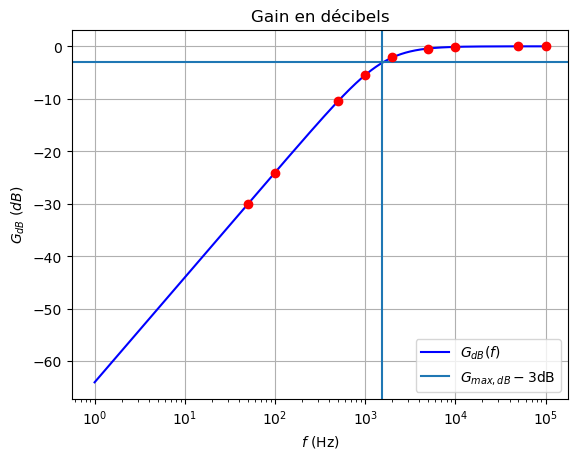

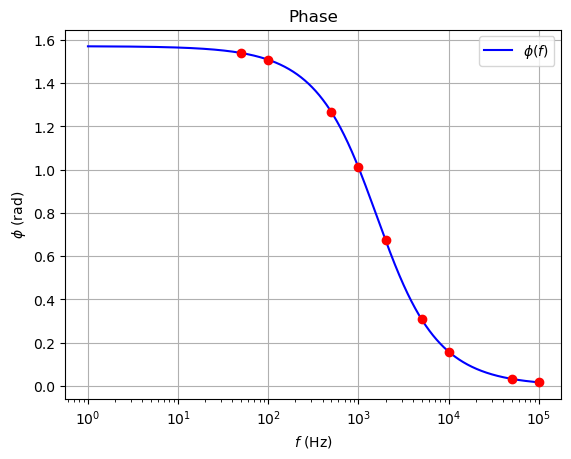

In [99]:
R = 1e3
L = 0.1

def transfert_rl(f, R, L):
    omeg = 2*np.pi*f
    denom = R + L*omeg*1j
    return (1j*L*omeg)/denom


def gain_rl(f, R, C):
    return np.abs(transfert_rl(f, R, C))
    #omeg = 2*np.pi*f
    #denom = R**2 + 1/(C*omeg)**2
    #return (R**2)/denom

def phase_rl(f, R, C):
    return np.angle(transfert_rl(f, R, C))
    #omeg = 2*np.pi*f
    #denom = R**2 + 1/(C*omeg)**2
    #return (R/(C*omeg))/denom


f_theo = np.array([50, 100, 500, 1e3, 2e3, 5e3, 1e4, 5e4, 1e5])
gainRL_theo = gain_rl(f_theo, R, L)
gainRL_theo_db = 20*np.log10(gainRL_theo)

print(f"gain(fc) = {gain_fc}, notre approximation graphique (avec fc = 1.55 kHz) = {gain_rc(1.55e3, R, C)} \ng")
print(f"f_theo avec k=2, {f_theo}")

f = np.linspace(20, 100e3, 1000000)
gainRL = gain_rl(f, R, L)
gainRL_dB = 20*np.log10(gainRL)



plt.plot(f, gainRL_dB, color="b", label="$G_{dB}(f)$")
plt.scatter(f_theo, gainRL_theo_db, color="r", zorder=5)

plt.axhline(-3, label="$G_{max, dB}-3$dB")
plt.axvline(1.55e3)

#plt.yscale("log")
plt.xscale("log")

plt.ylabel("$G_{dB}$ ($dB$)")
plt.xlabel("$f$ (Hz)")

plt.legend()
plt.title("Gain en décibels")

plt.grid()
plt.show()


phaseRL = phase_rl(f, R, L)
phaseRL_theo = phase_rl(f_theo, R, L)

plt.plot(f, phaseRL, color="b", label="$\phi(f)$")
plt.scatter(f_theo, phaseRL_theo, color="r", zorder=5)
#plt.plot(f, phase2, color="r")

#plt.yscale("log")
plt.xscale("log")

plt.ylabel("$\phi$ (rad)")
plt.xlabel("$f$ (Hz)")

plt.grid()
plt.legend()
plt.title("Phase")
plt.show()

In [90]:
print("Theoretical points RL")
for e in f_theo:
    print(f"({e:0.2f}, {20*np.log10(gain_rl(e, R, L)):0.2f})")

Theoretical points RL
(50.00, -30.06)
(100.00, -24.05)
(500.00, -10.47)
(1000.00, -5.48)
(2000.00, -2.13)
(5000.00, -0.42)
(10000.00, -0.11)
(50000.00, -0.00)
(100000.00, -0.00)


In [98]:
print("Theoretical points phase for RL")
for e in f_theo:
    print(f"({e:0.2f}, {np.rad2deg(phase_rl(e, R, L)):0.2f})")

Theoretical points phase for RL
(50.00, 88.20)
(100.00, 86.40)
(500.00, 72.56)
(1000.00, 57.86)
(2000.00, 38.51)
(5000.00, 17.66)
(10000.00, 9.04)
(50000.00, 1.82)
(100000.00, 0.91)
